# Lower WG Region Heat Budget
multiple grid cells

In [1]:
from dask.distributed import Client

client = Client("tcp://10.32.22.9:36199")
client

Client Scheduler: tcp://10.32.22.9:36199 Dashboard: /user/0000-0002-8176-9465/proxy/8787/status,Cluster Workers: 6 Cores: 12 Memory: 69.00 GB


In [2]:
import xarray as xr
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
import intake
%matplotlib inline

/srv/conda/envs/notebook/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
ocean_url = 'https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean.yaml'
ocean_cat = intake.Catalog(ocean_url)
ds = ocean_cat["SOSE"].to_dask()
ds

<xarray.Dataset>
Dimensions:   (XC: 2160, XG: 2160, YC: 320, YG: 320, Z: 42, Zl: 42, Zp1: 43, Zu: 42, time: 438)
Coordinates:
    Depth     (YC, XC) float32 dask.array<shape=(320, 2160), chunksize=(320, 2160)>
    PHrefC    (Z) float32 dask.array<shape=(42,), chunksize=(42,)>
    PHrefF    (Zp1) float32 dask.array<shape=(43,), chunksize=(43,)>
  * XC        (XC) float32 0.083333336 0.25 0.4166667 ... 359.75 359.9167
  * XG        (XG) float32 5.551115e-17 0.16666667 ... 359.6667 359.83334
  * YC        (YC) float32 -77.87497 -77.7083 -77.54163 ... -24.874966 -24.7083
  * YG        (YG) float32 -77.9583 -77.79163 -77.62497 ... -24.9583 -24.791632
  * Z         (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
  * Zl        (Zl) float32 0.0 -10.0 -21.0 -33.0 ... -4950.0 -5200.0 -5450.0
  * Zp1       (Zp1) float32 0.0 -10.0 -21.0 -33.0 ... -5200.0 -5450.0 -5700.0
  * Zu        (Zu) float32 -10.0 -21.0 -33.0 -46.0 ... -5200.0 -5450.0 -5700.0
    drC       (Zp1) float32 dask.ar

In [39]:
import xgcm
grid = xgcm.Grid(ds, periodic=('X', 'Y'))
grid

<xgcm.Grid>
Y Axis (periodic):
  * center   YC --> left
  * left     YG --> center
X Axis (periodic):
  * center   XC --> left
  * left     XG --> center
Z Axis (not periodic):
  * center   Z --> left
  * left     Zl --> center
  * outer    Zp1 --> center
  * right    Zu --> center
T Axis (not periodic):
  * center   time

In [5]:
coords = ds.coords.to_dataset().reset_coords() #ds split into coords
dsr = ds.reset_coords(drop=True) #ds dropping coords so it just holds data variables
dsr

<xarray.Dataset>
Dimensions:   (XC: 2160, XG: 2160, YC: 320, YG: 320, Z: 42, Zl: 42, Zp1: 43, Zu: 42, time: 438)
Coordinates:
  * XC        (XC) float32 0.083333336 0.25 0.4166667 ... 359.75 359.9167
  * XG        (XG) float32 5.551115e-17 0.16666667 ... 359.6667 359.83334
  * YC        (YC) float32 -77.87497 -77.7083 -77.54163 ... -24.874966 -24.7083
  * YG        (YG) float32 -77.9583 -77.79163 -77.62497 ... -24.9583 -24.791632
  * Z         (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
  * Zl        (Zl) float32 0.0 -10.0 -21.0 -33.0 ... -4950.0 -5200.0 -5450.0
  * Zp1       (Zp1) float32 0.0 -10.0 -21.0 -33.0 ... -5200.0 -5450.0 -5700.0
  * Zu        (Zu) float32 -10.0 -21.0 -33.0 -46.0 ... -5200.0 -5450.0 -5700.0
  * time      (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
Data variables:
    ADVr_SLT  (time, Zl, YC, XC) float32 dask.array<shape=(438, 42, 320, 2160), chunksize=(1, 42, 320, 2160)>
    ADVr_TH   (time, Zl, YC, XC) float32 dask.array<shap

In [7]:
dsr.Z

<xarray.DataArray 'Z' (Z: 42)>
array([-5.0000e+00, -1.5500e+01, -2.7000e+01, -3.9500e+01, -5.3000e+01,
       -6.8000e+01, -8.5000e+01, -1.0400e+02, -1.2550e+02, -1.5000e+02,
       -1.7750e+02, -2.0850e+02, -2.4350e+02, -2.8300e+02, -3.2800e+02,
       -3.7950e+02, -4.3850e+02, -5.0600e+02, -5.8300e+02, -6.7100e+02,
       -7.7200e+02, -8.8800e+02, -1.0210e+03, -1.1735e+03, -1.3485e+03,
       -1.5495e+03, -1.7805e+03, -2.0460e+03, -2.3190e+03, -2.5750e+03,
       -2.8250e+03, -3.0750e+03, -3.3250e+03, -3.5750e+03, -3.8250e+03,
       -4.0750e+03, -4.3250e+03, -4.5750e+03, -4.8250e+03, -5.0750e+03,
       -5.3250e+03, -5.5750e+03], dtype=float32)
Coordinates:
  * Z        (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
Attributes:
    axis:           Z
    long_name:      vertical coordinate of cell center
    positive:       down
    standard_name:  depth
    units:          m

In [8]:
dsr.Zl

<xarray.DataArray 'Zl' (Zl: 42)>
array([    0.,   -10.,   -21.,   -33.,   -46.,   -60.,   -76.,   -94.,  -114.,
        -137.,  -163.,  -192.,  -225.,  -262.,  -304.,  -352.,  -407.,  -470.,
        -542.,  -624.,  -718.,  -826.,  -950., -1092., -1255., -1442., -1657.,
       -1904., -2188., -2450., -2700., -2950., -3200., -3450., -3700., -3950.,
       -4200., -4450., -4700., -4950., -5200., -5450.], dtype=float32)
Coordinates:
  * Zl       (Zl) float32 0.0 -10.0 -21.0 -33.0 ... -4950.0 -5200.0 -5450.0
Attributes:
    axis:               Z
    c_grid_axis_shift:  -0.5
    long_name:          vertical coordinate of upper cell interface
    positive:           down
    standard_name:      depth_at_upper_w_location
    units:              m

In [6]:
y_lower = 70
y_upper = 72
y_x_center = 1920

x_left = 1920
x_right = 1922
x_y_center = 70

z = [14, 43]

zl1 = 14
zl2 = 43

In [7]:
#set the boundaries
y_lat_range_lower = dict(YG=slice(y_lower, y_upper))
y_lon_range_lower = dict(XC=y_x_center)

x_lat_range_lower = dict(YC=x_y_center)
x_lon_range_lower = dict(XG=slice(x_left, x_right))

lower_cell_range = dict(Zl=[14, 42])
lower_cell_range_z = dict(Z=slice(14, 42))

In [8]:
#advective flux
adv_flux_y_lower = dsr.ADVy_TH.isel(**y_lon_range_lower, **y_lat_range_lower, **lower_cell_range_z).diff(
                                                                                  dim='YG').sum(dim='Z').load()
adv_flux_x_lower = dsr.ADVx_TH.isel(**x_lon_range_lower, **x_lat_range_lower, **lower_cell_range_z).diff(
                                                                                  dim='XG').sum(dim='Z').load()
adv_flux_z_lower =  dsr.ADVr_TH.isel(**y_lon_range_lower, **x_lat_range_lower, Zl=14).load()

adv_flux_lower = adv_flux_x_lower + adv_flux_y_lower + adv_flux_z_lower
adv_flux_lower.load()
#units: (˚C m^3)/s

<xarray.DataArray (time: 438, XG: 1, YG: 1)>
array([[[-269.461   ]],

       [[  47.871338]],

       ...,

       [[-656.42487 ]],

       [[-931.25665 ]]], dtype=float32)
Coordinates:
  * XG       (XG) float32 320.1667
    YC       float32 -66.2083
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
    XC       float32 320.08334
  * YG       (YG) float32 -66.12497
    Zl       float32 -304.0

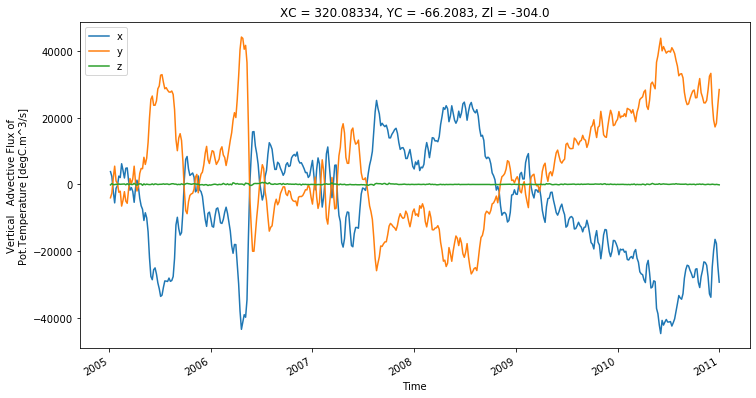

In [9]:
plt.figure(figsize=(12,6))

adv_flux_x_lower.plot(label='x')
adv_flux_y_lower.plot(label='y')
adv_flux_z_lower.plot(label='z')
plt.legend()

In [10]:
#diffusive flux
diff_flux_y_lower = dsr.DFyE_TH.isel(**y_lon_range_lower, **y_lat_range_lower, **lower_cell_range_z).diff(
                                                                                  dim='YG').sum(dim='Z').load()
diff_flux_x_lower = dsr.DFxE_TH.isel(**x_lon_range_lower, **x_lat_range_lower, **lower_cell_range_z).diff(
                                                                                  dim='XG').sum(dim='Z').load()
diff_flux_z_lower =  (dsr.DFrE_TH.isel(**y_lon_range_lower, **x_lat_range_lower, Zl=14).load()
                     + dsr.DFrI_TH.isel(**y_lon_range_lower, **x_lat_range_lower, Zl=14).load()
                     + dsr.KPPg_TH.isel(**y_lon_range_lower, **x_lat_range_lower, Zl=14).load())

diff_flux_lower = diff_flux_x_lower + diff_flux_y_lower + diff_flux_z_lower
diff_flux_lower.load()
#units: (˚C m^3)/s

<xarray.DataArray (time: 438, XG: 1, YG: 1)>
array([[[  23.107786]],

       [[  28.4517  ]],

       ...,

       [[-658.59845 ]],

       [[-602.0453  ]]], dtype=float32)
Coordinates:
  * XG       (XG) float32 320.1667
    YC       float32 -66.2083
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
    XC       float32 320.08334
  * YG       (YG) float32 -66.12497
    Zl       float32 -304.0

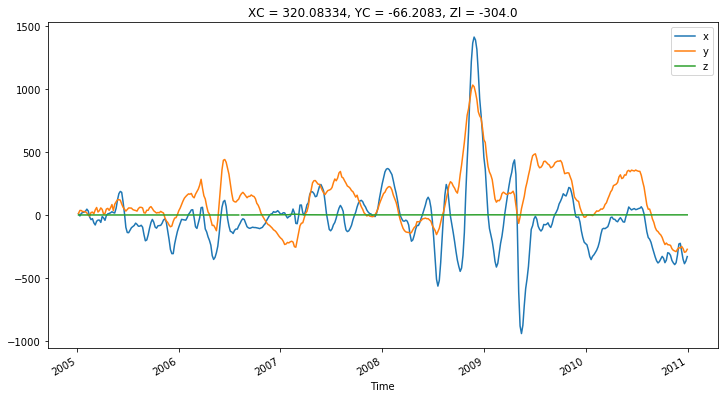

In [11]:
plt.figure(figsize=(12,6))
diff_flux_x_lower.plot(label='x')
diff_flux_y_lower.plot(label='y')
diff_flux_z_lower.plot(label='z')
plt.legend()

In [12]:
tottend_weddell_lower = ((dsr.TOTTTEND * coords.rA * coords.drF * coords.hFacC).isel(
                         **y_lon_range_lower, **x_lat_range_lower, **lower_cell_range_z).sum(
                                                                            dim=['Z']))/ (24*60*60)
tottend_weddell_lower.load()
#units: (˚C m^3)/s

<xarray.DataArray (time: 438)>
array([ 246.352963,  -76.322928,  121.743403, ...,    1.817187, 1315.022778,
       1533.301481])
Coordinates:
    XC       float32 320.08334
    YC       float32 -66.2083
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31

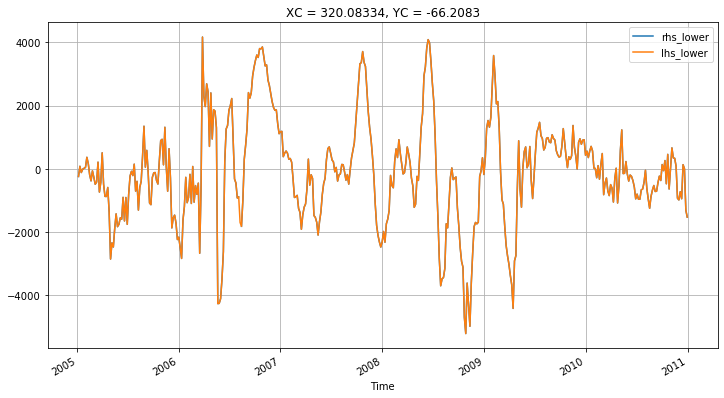

In [13]:
plt.figure(figsize=(12,6))
rhs_lower = adv_flux_lower + diff_flux_lower
lhs_lower =  - tottend_weddell_lower
rhs_lower.plot(label='rhs_lower')
lhs_lower.plot(label='lhs_lower')
plt.legend()
plt.grid();
# tried dividing by 24 (too big), then 24*60 (still too big but better), then 24*60*60 but then it's 0. 

In [14]:
all_terms_lower = xr.merge([adv_flux_lower.rename('adv_flux'), 
                            diff_flux_lower.rename('diff_flux'),
                            tottend_weddell_lower.rename('tottend')])
all_terms_lower

<xarray.Dataset>
Dimensions:    (XG: 1, YG: 1, time: 438)
Coordinates:
  * XG         (XG) float32 320.1667
    YC         float32 -66.2083
  * time       (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
    XC         float32 320.08334
  * YG         (YG) float32 -66.12497
    Zl         float32 -304.0
Data variables:
    adv_flux   (time, XG, YG) float32 -269.461 47.871338 ... -931.25665
    diff_flux  (time, XG, YG) float32 23.107786 28.4517 ... -658.59845 -602.0453
    tottend    (time) float64 246.4 -76.32 121.7 ... 1.817 1.315e+03 1.533e+03

In [15]:
df_lower = all_terms_lower.mean(dim='time').reset_coords(drop=True).to_array().to_dataframe(name='budget')
df_lower

,,,budget
variable,XG,YG,
adv_flux,320.166687,-66.124969,-185.405426
diff_flux,320.166687,-66.124969,85.830406
tottend,320.166687,-66.124969,99.572966


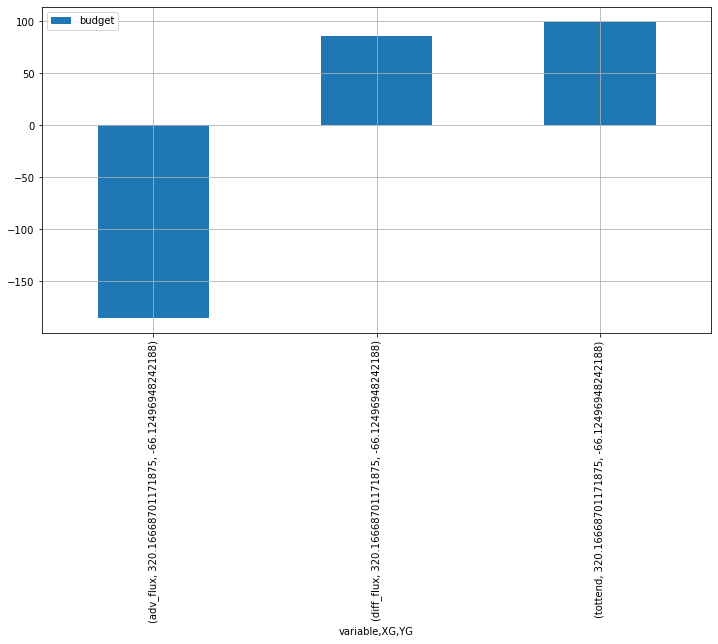

In [18]:
df_lower.plot(figsize=(12,6), kind='bar')
plt.grid()

# 1-42

In [19]:
y_lower = 70
y_upper = 72
y_x_center = 1920

x_left = 1920
x_right = 1922
x_y_center = 70

z = [1, 42]

zl1 = 1
zl2 = 42

In [20]:
#set the boundaries
y_lat_range_lower = dict(YG=slice(y_lower, y_upper))
y_lon_range_lower = dict(XC=y_x_center)

x_lat_range_lower = dict(YC=x_y_center)
x_lon_range_lower = dict(XG=slice(x_left, x_right))

lower_cell_range = dict(Zl=[1, 42])
lower_cell_range_z = dict(Z=slice(1, 42))

In [33]:
#advective flux
adv_flux_y_lower = dsr.ADVy_TH.isel(**y_lon_range_lower, **y_lat_range_lower, **lower_cell_range_z).diff(
                                                                                  dim='YG').sum(dim='Z').load()
adv_flux_x_lower = dsr.ADVx_TH.isel(**x_lon_range_lower, **x_lat_range_lower, **lower_cell_range_z).diff(
                                                                                  dim='XG').sum(dim='Z').load()
adv_flux_z_lower = dsr.ADVr_TH.isel(**y_lon_range_lower, **x_lat_range_lower, Zl=1).load()

adv_flux_lower = adv_flux_x_lower + adv_flux_y_lower + adv_flux_z_lower
adv_flux_lower.load()
#units: (˚C m^3)/s

<xarray.DataArray (time: 438, XG: 1, YG: 1)>
array([[[  905.29095]],

       [[-1126.0587 ]],

       ...,

       [[-1148.523  ]],

       [[ -776.08813]]], dtype=float32)
Coordinates:
  * XG       (XG) float32 320.1667
    YC       float32 -66.2083
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
    XC       float32 320.08334
  * YG       (YG) float32 -66.12497
    Zl       float32 -10.0

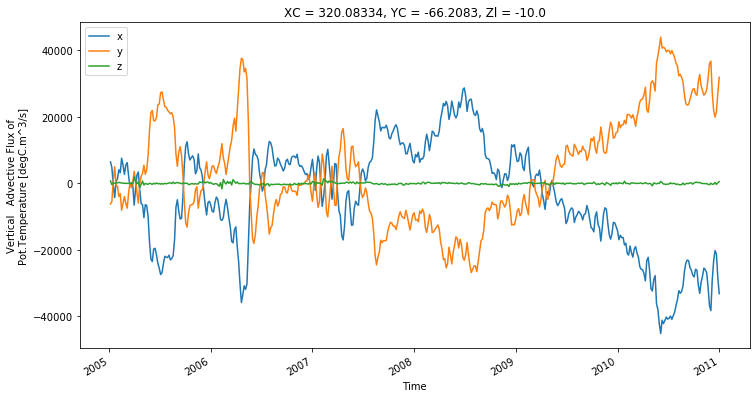

In [34]:
plt.figure(figsize=(12,6))

adv_flux_x_lower.plot(label='x')
adv_flux_y_lower.plot(label='y')
adv_flux_z_lower.plot(label='z')
plt.legend()

In [31]:
#diffusive flux
diff_flux_y_lower = dsr.DFyE_TH.isel(**y_lon_range_lower, **y_lat_range_lower, **lower_cell_range_z).diff(
                                                                                  dim='YG').sum(dim='Z').load()
diff_flux_x_lower = dsr.DFxE_TH.isel(**x_lon_range_lower, **x_lat_range_lower, **lower_cell_range_z).diff(
                                                                                  dim='XG').sum(dim='Z').load()
diff_flux_z_lower = (dsr.DFrE_TH.isel(**y_lon_range_lower, **x_lat_range_lower, Zl=1).load()
                   + dsr.DFrI_TH.isel(**y_lon_range_lower, **x_lat_range_lower, Zl=1).load()
                   + dsr.KPPg_TH.isel(**y_lon_range_lower, **x_lat_range_lower, Zl=1).load())

diff_flux_lower = diff_flux_x_lower + diff_flux_y_lower + diff_flux_z_lower
diff_flux_lower.load()
#units: (˚C m^3)/s

<xarray.DataArray (time: 438, XG: 1, YG: 1)>
array([[[  -45.71881]],

       [[-2352.3997 ]],

       ...,

       [[ -824.8005 ]],

       [[ -743.5644 ]]], dtype=float32)
Coordinates:
  * XG       (XG) float32 320.1667
    YC       float32 -66.2083
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
    XC       float32 320.08334
  * YG       (YG) float32 -66.12497
    Zl       float32 -10.0

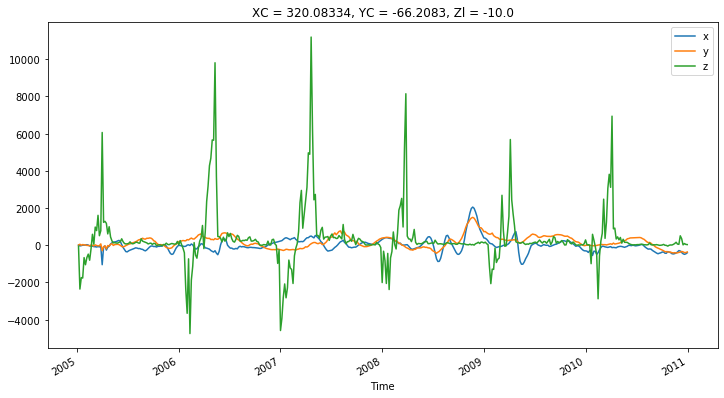

In [32]:
plt.figure(figsize=(12,6))
diff_flux_x_lower.plot(label='x')
diff_flux_y_lower.plot(label='y')
diff_flux_z_lower.plot(label='z')
plt.legend()

In [46]:
tottend_weddell_lower = ((dsr.TOTTTEND * coords.rA * coords.drF * coords.hFacC).isel(
                         **y_lon_range_lower, **x_lat_range_lower, **lower_cell_range_z).sum(
                                                                            dim=['Z']))/ (24*60*60)
tottend_weddell_lower.load()
#units: (˚C m^3)/s

<xarray.DataArray (time: 438)>
array([ 780.760741, 5249.798519, 2994.861296, ..., 1267.836204, 2489.592037,
       2524.044815])
Coordinates:
    XC       float32 320.08334
    YC       float32 -66.2083
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31

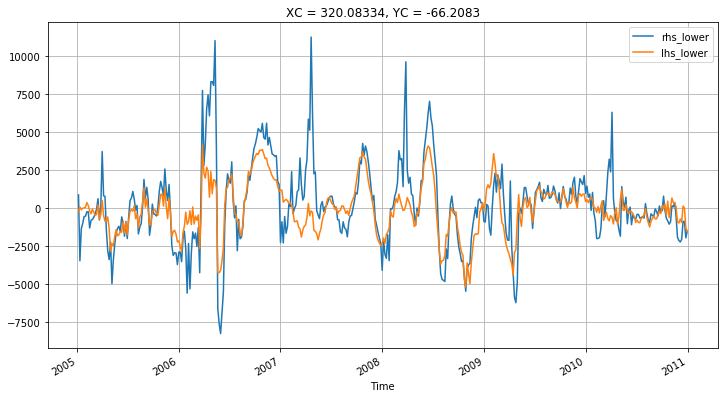

In [35]:
plt.figure(figsize=(12,6))
rhs_lower = adv_flux_lower + diff_flux_lower
lhs_lower =  - tottend_weddell_lower
rhs_lower.plot(label='rhs_lower')
lhs_lower.plot(label='lhs_lower')
plt.legend()
plt.grid();
# tried dividing by 24 (too big), then 24*60 (still too big but better), then 24*60*60 but then it's 0. 

In [37]:
# constants
heat_capacity_cp = 3.994e3
runit2mass = 1.035e3

# treat the shortwave flux separately from the rest of the surface flux
surf_flux_th = (dsr.TFLUX - dsr.oceQsw) * coords.rA / (heat_capacity_cp * runit2mass)
surf_flux_th_sw = dsr.oceQsw * coords.rA / (heat_capacity_cp * runit2mass)

# salt
#surf_flux_slt = dsr.SFLUX * coords.rA  / runit2mass
#lin_fs_correction_th = -(dsr.WTHMASS.isel(Zl=0, drop=True) * coords.rA)
#lin_fs_correction_slt = -(dsr.WSLTMASS.isel(Zl=0, drop=True) * coords.rA)

# in order to align the surface fluxes with the rest of the 3D budget terms,
# we need to give them a z coordinate. We can do that with this function
def surface_to_3d(da):
    da.coords['Z'] = dsr.Z[0]
    return da.expand_dims(dim='Z', axis=1)

In [38]:
def swfrac(coords, fact=1., jwtype=2):
    """Clone of MITgcm routine for computing sw flux penetration.
    z: depth of output levels"""

    rfac = [0.58 , 0.62, 0.67, 0.77, 0.78]
    a1 = [0.35 , 0.6  , 1.0  , 1.5  , 1.4]
    a2 = [23.0 , 20.0 , 17.0 , 14.0 , 7.9 ]

    facz = fact * coords.Zl.sel(Zl=slice(0, -200))
    j = jwtype-1
    swdk = (rfac[j] * np.exp(facz / a1[j]) +
            (1-rfac[j]) * np.exp(facz / a2[j]))

    return swdk.rename('swdk')

_, swdown = xr.align(dsr.Zl, surf_flux_th_sw * swfrac(coords), join='left', )
swdown = swdown.fillna(0)

In [48]:
all_terms_lower['sw_flux'] = -grid.diff(swdown, 'Z', boundary='fill').fillna(0.)

In [ ]:
all_terms_lower.sw_flux.values

In [44]:
rhs = adv_flux_lower + diff_flux_lower + sw_flux
lhs = tottend_weddell_lower
rhs.plot(label='rhs')
lhs.plot(label='lhs')
plt.legend()
plt.grid()

NameError: name 'sw_flux' is not defined